<a href="https://colab.research.google.com/github/profesor79/3dReplicator/blob/master/Copy_of_Lotus_depth_3_(github).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# tested with images at 1920x1280 resolution
# images with different sizes can have errors (either due to splitting into sections or using too much RAM)


In [2]:
!git clone https://github.com/EnVision-Research/Lotus.git
%cd 'Lotus'

Cloning into 'Lotus'...
remote: Enumerating objects: 388, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 388 (delta 83), reused 69 (delta 69), pack-reused 295 (from 1)
Receiving objects: 100% (388/388), 18.16 MiB | 16.15 MiB/s, done.
Resolving deltas: 100% (157/157), done.
/content/Lotus


In [ ]:
%%capture
# !pip install numpy==1.26.4
!pip install torch==2.3.1 --index-url https://download.pytorch.org/whl/cu121
!pip install torchvision==0.18.1 --index-url https://download.pytorch.org/whl/cu121
!pip install torchaudio==2.3.1 --index-url https://download.pytorch.org/whl/cu121   #is this needed?
!pip install diffusers==0.28.0   #try updating so that huggingface cached_download isn't needed
# !pip install accelerate>=0.16.0
# !pip install accelerate==0.34.2
# !pip install transformers>=4.25.1
!pip install transformers==4.44.2
!pip install datasets==2.21.0
!pip install ftfy==6.2.3
# !pip install tensorboard==2.17.1
# !pip install Jinja2==3.1.4
!pip install peft==0.7.0
!pip install geffnet==1.0.2
# !pip install opencv-python==4.10.0.82
# !pip install matplotlib==3.8.4            #close enough
# !pip install h5py==3.11.0
!pip install omegaconf==2.3.0
# !pip install tabulate==0.9.0
# !pip install imageio==2.35.1
# !pip install imageio-ffmpeg==0.5.1
!pip install spaces==0.28.3
# !pip install gradio==4.44.0                 # is gradio needed?
# !pip install gradio-imageslider==0.0.20
# !pip install gradio-client==1.3.0

!rm /content/Lotus/assets/in-the-wild_example/*

In [ ]:
!pip install huggingface_hub==0.24.7
# !pip install huggingface_hub==0.28.1
# !pip install -U huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 27.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.30.2
    Uninstalling huggingface-hub-0.30.2:
      Successfully uninstalled huggingface-hub-0.30.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.25.1 requires huggingface-hub>=0.28.1, but you have huggingface-hub 0.24.7 which is incompatible.


/content


Saving asdf.jpg to asdf.jpg
mkdir: cannot create directory ‘temp_folder’: File exists
mkdir: cannot create directory ‘temp_tile_folder’: File exists
Processing Started
2025-04-15 11:05:15.985925: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744715116.006776   10399 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744715116.013444   10399 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-15 11:05:16.034745: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebui

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Original low resolution result


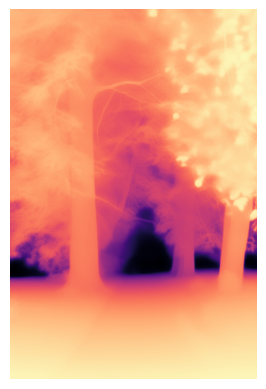


New high resolution result


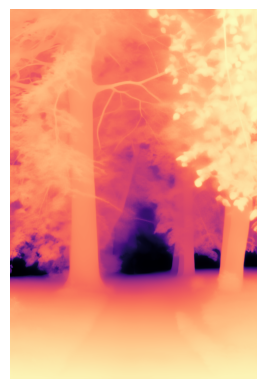

Processing ended


In [ ]:
#@title Code (press Ctrl + F9 to run)

from google.colab import files
%cd '/content/'
uploaded = files.upload()

import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

import os, contextlib
with open(os.devnull, 'w') as devnull:
    with contextlib.redirect_stdout(devnull):
        import numpy as np
        import cv2

dependencies = {}

# !pip install --upgrade timm==0.6.7 torch==2.0.1 torchvision==0.15.2

# !git clone https://github.com/isl-org/ZoeDepth.git
# %cd ZoeDepth
# !python sanity.py

# import torch
# from zoedepth.utils.misc import get_image_from_url, colorize
from PIL import Image
import matplotlib.pyplot as plt

# zoe = torch.hub.load(".", "ZoeD_N", source="local", pretrained=True)

# zoe = zoe.to('cuda')
# dependencies['zoe'] = zoe.to('cuda')

!mkdir temp_folder
!mkdir temp_tile_folder
# !cp unnamed.jpg temp_folder/


for filename in list(uploaded.keys()):
    print('Processing Started')

    img = Image.open('/content/' + filename)

    !cp $filename temp_folder/

    # Generate low resolution image
    # low_res_depth = zoe.infer_pil(img)
    # low_res_depth = dependencies['zoe'].infer_pil(img)

    !python Lotus/infer.py \
            --pretrained_model_name_or_path="jingheya/lotus-depth-g-v1-0" \
            --prediction_type="sample" \
            --seed=42 \
            --half_precision \
            --input_dir="temp_folder" \
            --task_name="depth" \
            --mode="generation" \
            --output_dir="low_res/depth/"

    low_res_depth_filename = "low_res/depth/depth/" + filename.split('.')[0] + '.npy'
    low_res_depth = Image.fromarray((2**16 * 0.999* np.load(low_res_depth_filename) / np.max(np.load(low_res_depth_filename))).astype("uint16"))

    low_res_scaled_depth = 2**16 - (low_res_depth - np.min(low_res_depth)) * (2**16*0.999) / (np.max(low_res_depth) - np.min(low_res_depth))

    low_res_depth_map_image = Image.fromarray((0.999 * low_res_scaled_depth).astype("uint16"))
    low_res_depth_map_image.save('zoe_depth_map_16bit_low.png')

    # Generate filters

    # store filters in lists
    im = np.asarray(img)

    # tile_sizes = [[4,4], [8,8]]
    tile_sizes = [[2,2],[4,4]]

    filters = []

    save_filter_images = True

    for tile_size in tile_sizes:

        num_x = tile_size[0]
        num_y = tile_size[1]

        M = im.shape[0]//num_x
        N = im.shape[1]//num_y

        filter_dict = {}
        filter_dict['right_filter'] = np.zeros((M, N))
        filter_dict['left_filter'] = np.zeros((M, N))
        filter_dict['top_filter'] = np.zeros((M, N))
        filter_dict['bottom_filter'] = np.zeros((M, N))
        filter_dict['top_right_filter'] = np.zeros((M, N))
        filter_dict['top_left_filter'] = np.zeros((M, N))
        filter_dict['bottom_right_filter'] = np.zeros((M, N))
        filter_dict['bottom_left_filter'] = np.zeros((M, N))
        filter_dict['filter'] = np.zeros((M, N))

        for i in range(M):
          for j in range(N):
              x_value = 0.998*np.cos((abs(M/2-i)/M)*np.pi)**2
              y_value = 0.998*np.cos((abs(N/2-j)/N)*np.pi)**2

              if j > N/2:
                  filter_dict['right_filter'][i,j] = x_value
              else:
                  filter_dict['right_filter'][i,j] = x_value * y_value

              if j < N/2:
                  filter_dict['left_filter'][i,j] = x_value
              else:
                  filter_dict['left_filter'][i,j] = x_value * y_value

              if i < M/2:
                  filter_dict['top_filter'][i,j] = y_value
              else:
                  filter_dict['top_filter'][i,j] = x_value * y_value

              if i > M/2:
                  filter_dict['bottom_filter'][i,j] = y_value
              else:
                  filter_dict['bottom_filter'][i,j] = x_value * y_value

              if j > N/2 and i < M/2:
                  filter_dict['top_right_filter'][i,j] = 0.998
              elif j > N/2:
                  filter_dict['top_right_filter'][i,j] = x_value
              elif i < M/2:
                  filter_dict['top_right_filter'][i,j] = y_value
              else:
                  filter_dict['top_right_filter'][i,j] = x_value * y_value

              if j < N/2 and i < M/2:
                  filter_dict['top_left_filter'][i,j] = 0.998
              elif j < N/2:
                  filter_dict['top_left_filter'][i,j] = x_value
              elif i < M/2:
                  filter_dict['top_left_filter'][i,j] = y_value
              else:
                  filter_dict['top_left_filter'][i,j] = x_value * y_value

              if j > N/2 and i > M/2:
                  filter_dict['bottom_right_filter'][i,j] = 0.998
              elif j > N/2:
                  filter_dict['bottom_right_filter'][i,j] = x_value
              elif i > M/2:
                  filter_dict['bottom_right_filter'][i,j] = y_value
              else:
                  filter_dict['bottom_right_filter'][i,j] = x_value * y_value

              if j < N/2 and i > M/2:
                  filter_dict['bottom_left_filter'][i,j] = 0.998
              elif j < N/2:
                  filter_dict['bottom_left_filter'][i,j] = x_value
              elif i > M/2:
                  filter_dict['bottom_left_filter'][i,j] = y_value
              else:
                  filter_dict['bottom_left_filter'][i,j] = x_value * y_value

              filter_dict['filter'][i,j] = x_value * y_value

        filters.append(filter_dict)

        if save_filter_images:
            for filter in list(filter_dict.keys()):
                filter_image = Image.fromarray((filter_dict[filter]*2**16).astype("uint16"))
                filter_image.save(f'mask_{filter}_{num_x}_{num_y}.png')


    # filters second section
    compiled_tiles_list = []

    for i in range(len(filters)):

        num_x = tile_sizes[i][0]
        num_y = tile_sizes[i][1]

        M = im.shape[0]//num_x
        N = im.shape[1]//num_y

        compiled_tiles = np.zeros((im.shape[0], im.shape[1]))

        x_coords = list(range(0,im.shape[0],im.shape[0]//num_x))[:num_x]
        y_coords = list(range(0,im.shape[1],im.shape[1]//num_y))[:num_y]

        x_coords_between = list(range((im.shape[0]//num_x)//2, im.shape[0], im.shape[0]//num_x))[:num_x-1]
        y_coords_between = list(range((im.shape[1]//num_y)//2,im.shape[1],im.shape[1]//num_y))[:num_y-1]

        x_coords_all = x_coords + x_coords_between
        y_coords_all = y_coords + y_coords_between

        for x in x_coords_all:
            for y in y_coords_all:

                # depth = dependencies['zoe'].infer_pil(Image.fromarray(np.uint8(im[x:x+M,y:y+N])))
                im_section = Image.fromarray(np.uint8(im[x:x+M,y:y+N]))

                im_section.save('temp_tile_folder/tile_section.png')

                !python Lotus/infer.py \
                        --pretrained_model_name_or_path="jingheya/lotus-depth-g-v1-0" \
                        --prediction_type="sample" \
                        --seed=42 \
                        --half_precision \
                        --input_dir="temp_tile_folder" \
                        --task_name="depth" \
                        --mode="generation" \
                        --output_dir="tile_section/depth/"

                # depth_filename = "tile_section/depth/depth/" + filename.split('.')[0] + '.npy'
                depth_filename = "/content/tile_section/depth/depth/tile_section.npy"
                depth = Image.fromarray((2**16 * 0.999* np.load(depth_filename) / np.max(np.load(depth_filename))).astype("uint16"))


                # !python Lotus/infer.py \
                #         --pretrained_model_name_or_path="jingheya/lotus-depth-g-v1-0" \
                #         --prediction_type="sample" \
                #         --seed=42 \
                #         --half_precision \
                #         --input_dir="content" \
                #         --task_name="depth" \
                #         --mode="generation" \
                #         --output_dir="content/tile_section/depth/"

                # depth_filename = "content/tile_section/depth/" + filename.split('.')[0] + '.npy'
                # depth = Image.fromarray((2**16 * 0.999* depth_filename / np.max(depth_filename)).astype("uint16"))

                scaled_depth = 2**16 - (depth - np.min(depth)) * (2**16*0.999) / (np.max(depth) - np.min(depth))

                if y == min(y_coords_all) and x == min(x_coords_all):
                    selected_filter = filters[i]['top_left_filter']
                elif y == min(y_coords_all) and x == max(x_coords_all):
                    selected_filter = filters[i]['bottom_left_filter']
                elif y == max(y_coords_all) and x == min(x_coords_all):
                    selected_filter = filters[i]['top_right_filter']
                elif y == max(y_coords_all) and x == max(x_coords_all):
                    selected_filter = filters[i]['bottom_right_filter']
                elif y == min(y_coords_all):
                    selected_filter = filters[i]['left_filter']
                elif y == max(y_coords_all):
                    selected_filter = filters[i]['right_filter']
                elif x == min(x_coords_all):
                    selected_filter = filters[i]['top_filter']
                elif x == max(x_coords_all):
                    selected_filter = filters[i]['bottom_filter']
                else:
                    selected_filter = filters[i]['filter']

                compiled_tiles[x:x+M, y:y+N] += selected_filter * (np.mean(low_res_scaled_depth[x:x+M, y:y+N]) + np.std(low_res_scaled_depth[x:x+M, y:y+N]) * ((scaled_depth - np.mean(scaled_depth)) /  np.std(scaled_depth)))

        compiled_tiles[compiled_tiles < 0] = 0
        compiled_tiles_list.append(compiled_tiles)

        tiled_depth_map = Image.fromarray((2**16 * 0.999 * compiled_tiles / np.max(compiled_tiles)).astype("uint16"))
        tiled_depth_map.save(f'tiled_depth_{i}.png')

    # combine depth maps
    from scipy.ndimage import gaussian_filter

    grey_im = np.mean(im,axis=2)

    tiles_blur = gaussian_filter(grey_im, sigma=20)
    tiles_difference = tiles_blur - grey_im

    tiles_difference = tiles_difference / np.max(tiles_difference)

    tiles_difference = gaussian_filter(tiles_difference, sigma=40)

    tiles_difference *= 5

    tiles_difference = np.clip(tiles_difference, 0, 0.999)

    mask_image = Image.fromarray((tiles_difference*2**16).astype("uint16"))
    mask_image.save('mask_image.png')

    combined_result = (tiles_difference * compiled_tiles_list[1] + (1-tiles_difference) * ((compiled_tiles_list[0] + low_res_scaled_depth)/2))/(2)

    combined_image = Image.fromarray((2**16 * 0.999* combined_result / np.max(combined_result)).astype("uint16"))
    # combined_image.save('combined_image.png')
    combined_image.save(filename.split('.')[0] + '_depth.png')
    files.download(filename.split('.')[0] + '_depth.png')

    level_zero_image = Image.fromarray((2**16 * 0.999* compiled_tiles_list[0] / np.max(compiled_tiles_list[0])).astype("uint16"))
    level_zero_image.save(filename.split('.')[0] + '_level_0.png')
    files.download(filename.split('.')[0] + '_level_0.png')

    level_one_image = Image.fromarray((2**16 * 0.999* compiled_tiles_list[1] / np.max(compiled_tiles_list[1])).astype("uint16"))
    level_one_image.save(filename.split('.')[0] + '_level_1.png')
    files.download(filename.split('.')[0] + '_level_1.png')

    # display output images

    print('Original low resolution result')
    plt.imshow(low_res_scaled_depth, 'magma')
    plt.axis("off")
    plt.show()

    print('\nNew high resolution result')
    plt.imshow(combined_result, 'magma')
    plt.axis("off")
    plt.show()

    print("Processing ended")
